## PRACA DOMOWA

Pracę domową (**pojedynczy plik** notatnika z rozszerzeniem .ipynb) należy przesłać za pośrednictwem platformy *MS Teams* (moduł Zadania) do poniedziałku **13 listopada 2023 roku do godziny 9:00**. Przesłanie rozwiązania po terminie skutkuje otrzymaniem 0 punktów za tę pracę domową.

**D1** (*2 punkty*). Zaimplementuj poniższą metodę 2-krokową:
$$x_{n+2} - \frac{2}{3}x_{n+1} - \frac{1}{3}x_n = \frac{h}{3}\big(5f_{n+1} - f_n\big).$$
Zastosuj ją do znalezienia przybliżonego rozwiązania problemu
$$x'(t) = (1-2t)x(t), \; x(0)=1.$$
Eksperyment przeprowadź na przedziale $t\in(0,3)$ i dla parametru kroku siatki $h$ równego $0{,}3$, $0{,}15$ oraz $0{,}075$. Do wyznaczenia wartości $x_1$ użyj metody Eulera (w tym przypadku $x_1 = 1+h$). 
1. Porównaj na wykresie otrzymane przybliżenia z prawdziwym rozwiązaniem.
2. Jaki rząd zgodności ma ta metoda? Przeprowadź niezbędne obliczenia. Za pomocą odpowiednich wykresów błędu globalnego zilustruj rząd dokładności.

**D2** (*2 punkty*). Zaimplementuj poniższą metodę 2-krokową:
$$x_{n+2}-x_{n+1}=hf_n.$$
Zastosuj ją do znalezienia przybliżonego rozwiązania problemu
$$x'(t) = -8x(t), \; x(0)=1.$$
Eksperyment przeprowadź na przedziale $t\in(0,5)$ i dla parametru kroku siatki $h$ równego $\frac{1}{7}$ oraz $\frac{1}{14}$. Do wyznaczenia wartości $x_1$ użyj znanego rozwiązania, tzn. $x(t_1)$. 
1. Porównaj na wykresie otrzymane przybliżenia z prawdziwym rozwiązaniem. 
2. Dla których parametrów $h$ metoda jest absolutnie stabilna? Uzasadnij odpowiedź.
3. Czy uzyskane wyniki pozwalają na stwierdzenie, że metoda jest rozbieżna? Czy rzeczywiście jest to metoda rozbieżna?

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [48]:
def euler_step(fun, t0, x0, h):
    x_new = x0 + h*fun(t0, x0)
    return x_new

## ZADANIE D1

In [4]:
def metoda_D1(fun, t0, t1, x0, x1, h):
    x_new = 2/3*x1 + 1/3*x0 + h/3*(5*fun(t1, x1) - fun(t0, x0))
    return x_new

In [58]:
def fun(t,x):
    dx = (1-2*t)*x
    return dx

tspan = [0,3]
x0 = 1

sol_true = lambda t: np.exp(t - (t**2))

Rozwiążmy równanie: 
$$x'(t) = (1-2t)x(t), \; x(0)=1$$

$$ \frac{dx}{dt} = (1-2t)x$$

$$ \int{\frac{dx}{x}} = \int{(1-2t)dt}$$

$$ \ln{x} = t-t^2 + C $$

Z warunku początkowego $x(0) = 1$ otrzymujemy, że:
$$ ln(1) = 0-0^2 + C$$
$$ C = 0 $$

Wracając do równania mamy, że:

$$ \ln{x} = t-t^2 $$

$$ x = e^{t-t^2}$$

In [59]:
h = 0.3
time = np.arange(tspan[0], tspan[1], h)
x = np.zeros(time.size)

x[0] = x0
x[1] = euler_step(fun, time[0], x[0], h)
for i in range(len(time)-2):
    x[i+2] = metoda_D1(fun, time[i], time[i+1], x[i], x[i+1], h)

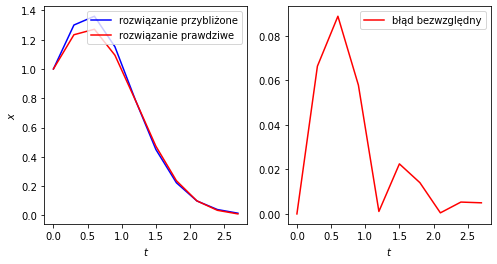

In [60]:
_, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].plot(time, x, 'b', label="rozwiązanie przybliżone")
axes[0].plot(time, sol_true(time), 'r', label="rozwiązanie prawdziwe")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$x$")
axes[0].legend()

axes[1].plot(time, np.abs(x-sol_true(time)), 'r', label="błąd bezwzględny")
axes[1].set_xlabel("$t$")
axes[1].legend()

plt.show()

In [61]:
h1 = 0.3

time1 = np.arange(tspan[0], tspan[1], h1)
x1 = np.zeros(time1.size)

x1[0] = x0
x1[1] = x0 + h1
for i in range(len(time1)-2):
    x1[i+2] = metoda_D1(fun, time1[i], time1[i+1], x1[i], x1[i+1], h1)

In [62]:
h2 = 0.15

time2 = np.arange(tspan[0], tspan[1], h2)
x2 = np.zeros(time2.size)

x2[0] = x0
x2[1] = x0 + h2
for i in range(len(time2)-2):
    x2[i+2] = metoda_D1(fun, time2[i], time2[i+1], x2[i], x2[i+1], h2)

In [63]:
h3 = 0.075

time3 = np.arange(tspan[0], tspan[1], h3)
x3 = np.zeros(time3.size)

x3[0] = x0
x3[1] = x0 + h3
for i in range(len(time3)-2):
    x3[i+2] = metoda_D1(fun, time3[i], time3[i+1], x3[i], x3[i+1], h3)

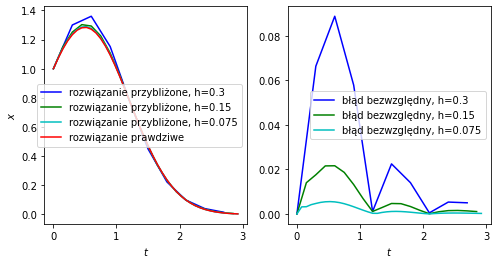

In [64]:
_, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].plot(time1, x1, 'b', label="rozwiązanie przybliżone, h=0.3")
axes[0].plot(time2, x2, 'g', label="rozwiązanie przybliżone, h=0.15")
axes[0].plot(time3, x3, 'c', label="rozwiązanie przybliżone, h=0.075")
axes[0].plot(time3, sol_true(time3), 'r', label="rozwiązanie prawdziwe")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$x$")
axes[0].legend()

axes[1].plot(time1, np.abs(x1-sol_true(time1)), 'b', label="błąd bezwzględny, h=0.3")
axes[1].plot(time2, np.abs(x2-sol_true(time2)), 'g', label="błąd bezwzględny, h=0.15")
axes[1].plot(time3, np.abs(x3-sol_true(time3)), 'c', label="błąd bezwzględny, h=0.075")
axes[1].set_xlabel("$t$")
axes[1].legend()

plt.show()

In [65]:
error1 = max(np.abs(x1-sol_true(time1)))
error2 = max(np.abs(x2-sol_true(time2)))
np.log(error1/error2)/np.log(2)

2.037490635071186

In [66]:
error1 = max(np.abs(x2-sol_true(time2)))
error2 = max(np.abs(x3-sol_true(time3)))
np.log(error1/error2)/np.log(2)

1.9676843302646194

Wyznaczenie teoretyczne rzędu zgodności

Na podstawie otrzymanych powyżej wyników przypuszczamy, że metoda ta ma rząd zgodności 2

Rząd zgodności metody wyznaczymy za pomocą liniowego operatora różnicowego $\mathscr{L}_h$
Z definicji wiemy, że jest on zgodny rzędu p, jeśli $\mathscr{L}_hz(t) = \mathscr{O}(h^{p+1})$

$$ \mathscr{L}_hz(t) = \sum_{j=0}^k (\alpha_jz(t+jh)-h\beta z'(t+jh))$$

$$ \alpha_0 = \frac{-1}{3} , \alpha_1 = \frac{-2}{3} , \alpha_2 = 1 $$
$$\beta_0 = \frac{-1}{3} , \beta_1 = \frac{5}{3}$$


$$\mathscr{L}_hz(t) = z(t+2h)-\frac{2}{3}z(t+h)-\frac{1}{3}z(t) - \frac{5}{3}hz'(t+h)+\frac{1}{3}hz'(t) =$$

$$ = z(t)+z'(t)2h+z''(t)2h^2+z'''(t)\frac{4}{3}h^3+O(h^4) + $$
$$- \frac{2}{3}(z(t)+z'(t)h+z''(t)\frac{h^2}{2}+z'''(t)\frac{h^3}{6}+O(h^4)) - \frac{1}{3}z(t)$$
$$ - \frac{5}{3}h(z'(t)+z''(t)h+z'''(t)\frac{h^2}{2}+o(h^3))+\frac{1}{3}hz'(t) = $$

$$ = O(h^3) $$

Czyli zgodnie z definicją, otrzymujemy, że rozważana metoda jest rzędu 2, co pokrywa się z obliczeniami numerycznymi

## ZADANIE D2

In [74]:
def metoda_D2(fun, t0, t1, x0, x1, h):
    x_new = x1 + h*fun(t0, x0)
    return x_new

In [105]:
def fun(t,x):
    dx = (-8)*x
    return dx

tspan = [0,5]
x0 = 1

sol_true = lambda t: np.exp(-8*t)

Rozwiążmy równanie: 
$$x'(t) = -8x(t), \; x(0)=1$$

$$ \frac{dx}{dt} = -8x$$

$$ \int{\frac{dx}{x}} = \int{-8dt}$$

$$ \ln{x} = -8t + C $$

Z warunku początkowego $x(0) = 1$ otrzymujemy, że:
$$ ln(1) = -8\cdot 0 + C$$
$$ C = 0 $$

Wracając do równania mamy, że:

$$ \ln{x} = -8t $$

$$ x = e^{-8t}$$

In [106]:
h = 1/7
time = np.arange(tspan[0], tspan[1], h)
x = np.zeros(time.size)

x[0] = x0
x[1] = sol_true(time[1])
for i in range(len(time)-2):
    x[i+2] = metoda_D2(fun, time[i], time[i+1], x[i], x[i+1], h)

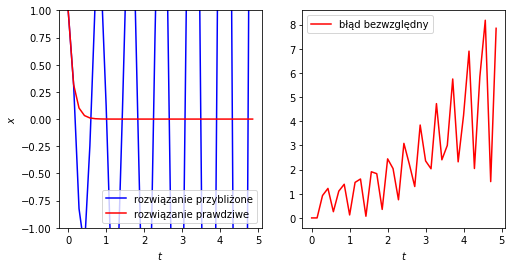

In [107]:
_, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].plot(time, x, 'b', label="rozwiązanie przybliżone")
axes[0].plot(time, sol_true(time), 'r', label="rozwiązanie prawdziwe")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$x$")
axes[0].set_ylim(-1, 1)
axes[0].legend()

axes[1].plot(time, np.abs(x-sol_true(time)), 'r', label="błąd bezwzględny")
axes[1].set_xlabel("$t$")
axes[1].legend()

plt.show()

In [108]:
h = 1/32
time = np.arange(tspan[0], tspan[1], h)
x = np.zeros(time.size)

x[0] = x0
x[1] = sol_true(time[1])
for i in range(len(time)-2):
    x[i+2] = metoda_D2(fun, time[i], time[i+1], x[i], x[i+1], h)

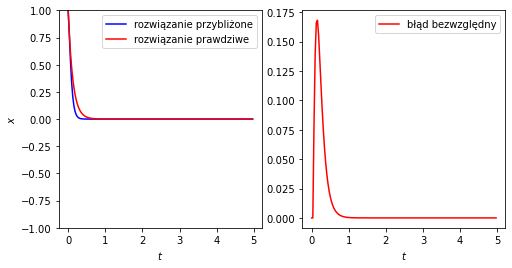

In [109]:
_, axes = plt.subplots(1, 2, figsize=(8,4))
axes[0].plot(time, x, 'b', label="rozwiązanie przybliżone")
axes[0].plot(time, sol_true(time), 'r', label="rozwiązanie prawdziwe")
axes[0].set_xlabel("$t$")
axes[0].set_ylabel("$x$")
axes[0].set_ylim(-1, 1)
axes[0].legend()

axes[1].plot(time, np.abs(x-sol_true(time)), 'r', label="błąd bezwzględny")
axes[1].set_xlabel("$t$")
axes[1].legend()

plt.show()

Wyznaczymy paramtery h, dla których metoda jest absolutnie stabilna. Do tego celu wykorzystamy definicję wielomianu stabilności:
    
Wielomianem stabilności metody dla danej wartości $\hat{h}$ nazywamy wielomian $p(r) = \rho(r)-\hat{h}\sigma(r)$
Metoda jest absolutnie stablina dla danego $h=\lambda\hat{h}$ wtedy i tylko wtedy gdy wszystkie pierwiastki wielomianu stabilności leżą wewnątrz koła jednostkowego

Dla danej metody otrzymujemy następujące wielomiany:
$\rho(r) = r^2-r $  ,  $\sigma(r) = 1$ natomiast $\hat{h}$ przyjmuje wartość $-8h$
$$p(r) = r^2-r+8h$$
$$p(r) = 0 \iff r = \frac{1\pm\sqrt{1-32h}}{2}$$

Aby pierwiastki leżały wewnętrz koła jednostkowego, muszą spełnić warunek: $$|\frac{1\pm\sqrt{1-32h}}{2}| < 1$$

Chcemy teraz określić dla której wartości h: $h=\frac{1}{7}$ czy $h=\frac{1}{14}$ metoda jest absolutnie stabilna

Wiemy, że liniowa metoda k-krokowa jest absolutnie stabilna, jeśli po zastosowaniu do probelmu $x(t) = \lambda x(t)$ gdzie $Re \lambda < 0$ i wartość $\hat{h} = h\lambda$ jest dana, jej rozwiązania zbiegają do zera, gdy $n \to \infty$ dla dowolnego wyboru wartości startowych

Na podstawie otrzymanych wykresów, zgodnie z powyższym krytetrium możemy stwierdzić, że dla $h=\frac{1}{14}$ metoda jest absolutnie stabilna, a dla $h=\frac{1}{7}$ nie


Potwierdzają to obliczenia:

Dla $h = \frac{1}{7}$ mamy:
$$|\frac{1+\sqrt{1-32\cdot\frac{1}{7}}}{2}| = 2\sqrt{\frac{2}{7}} > 1$$ 
$$|\frac{1-\sqrt{1-32\cdot\frac{1}{7}}}{2}| = 2\sqrt{\frac{2}{7}} > 1$$ 
Co nie spełnia warunku, że pierwiastki mają leżeć wewnętrz okręgu jednostkowego

Dla $h = \frac{1}{14}$ mamy:
$$|\frac{1+\sqrt{1-32\cdot\frac{1}{14}}}{2}| = \frac{2\sqrt{7}}{7} < 1$$ 
$$|\frac{1-\sqrt{1-32\cdot\frac{1}{14}}}{2}| = \frac{2\sqrt{7}}{7} < 1$$ 
Co spełnia warunek, że pierwiastki mają leżeć wewnętrz okręgu jednostkowego

Czyli otrzymujemy, że metoda jest absolutnie stabilna dla $h=\frac{1}{14}$ a dla $h=\frac{1}{7}$ nie

Metoda jest zbieżna rzędu p wtedy i tylko wtedy, gdy jest 0-stabilna i ma zgodność rzędu p

Zbadajmy 0-stabilność metody. Metoda jest 0-stabilna wtedy i tylko wtedy gdy wszystkie pierwiastki pierwszego wielomianu leżą wewnętrz lub na okręgu koła jednostkowego, a pierwiastki leżące na brzegu są pojedyncze.

$$\rho(r) = r^2-r$$
$$\rho(r) = 0 \iff r^2-r = 0 \iff r = 0 \lor r = 1$$

Czyli mamy jeden pierwiastek leżący wewnętrz okręgu i jeden na brzegu, czyli metoda jest stabilna

Teraz musimy określić, czy metoda jest zgodna

$$\mathscr{L}_hz(t) = z(t+2h)-z(t+h)-hz'(t) = $$
$$=z(t)+z'(t)2h+O(h^2)-(z(t)+z'(t)h+O(h^2))-hz'(t) = O(h^2)$$

Otrzymujemy, że metoda jest zgodna rzędu 1, a zatem metoda jest zbieżna rzędu 1